In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
def show_image(image):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

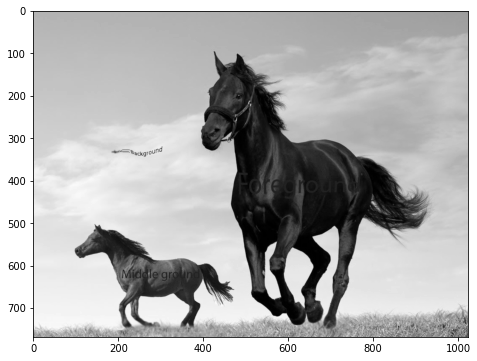

In [3]:
image = cv2.imread('temp2.jpg', 0)
show_image(image)

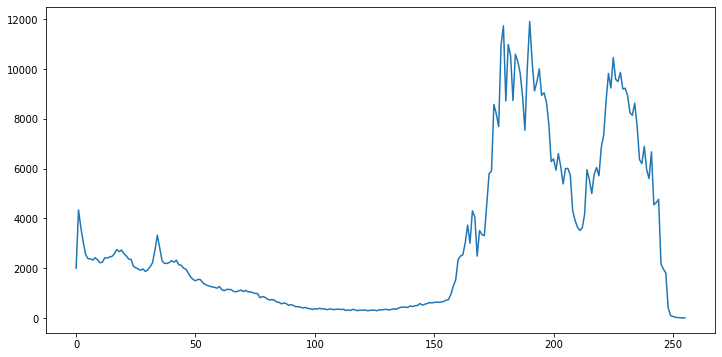

In [4]:
plt.plot(cv2.calcHist([image], [0], None, [256], [0, 256]))
plt.show()

In [5]:
p = cv2.calcHist([image], [0], None, [256], [0, 256]
                 ).flatten() / (image.shape[0] * image.shape[1])

In [6]:
def theta(t):
    return p[: t+1].sum()

In [7]:
def cmean(t):
    return sum([x * p[x] for x in range(t+1)])

In [8]:
gmean = cmean(255)

In [9]:
def formula(t):
    # between-class variance which should be maximized
    if theta(t) == 0 or theta(t) == 1.0:
        return -1
    return (cmean(t) - gmean*theta(t))**2 / (theta(t) * (1-theta(t)))

In [10]:
variances = np.array([formula(t) for t in range(256)])
thresh = variances.argmax()

In [11]:
new = np.where(image > thresh, 255, image)

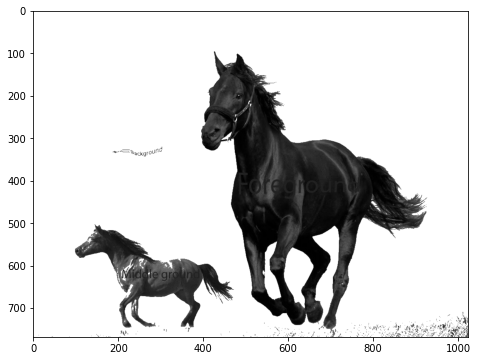

In [12]:
show_image(new)